# IN-VEHICLE-COUPON-RECOMMENDATION

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Importing dataset
data=pd.read_csv(r'Data.csv')

In [ ]:
pd.set_option('display.max_columns',200)

In [ ]:
#lets check the dimensionality of the raw data
data.shape

(12684, 25)

## Data Exploration
Let's take a peek into the data and explore the data and its variables. The dataset is a supervised learning dataset with over 12000 instances and 25 attributes.

In [ ]:
#load the data to understand the attributes and data types
data.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#let's take a peek at data columns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [ ]:
#let's look at the data types
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Accept(Y/N?)             int64
dtype: object

It seems that the data has few numberical datatypes and the rest are string objects, however Most of the numeric value in the dataset have 2 numeric value that consists 1 or 0, except the temperature.

In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [ ]:
#Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

There are some missing values in some columns.The dataset provides the empty value in car, bar, coffeeHouse, carryAway, Restaurant20To50 , and RestaurantLessThan20 columns.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                      Missing Percentage
car                            99.148534
CoffeeHouse                     1.710817
Restaurant20To50                1.490066
CarryAway                       1.190476
RestaurantLessThan20            1.024913
Bar                             0.843582
destination                     0.000000
direction_opp                   0.000000
direction_same                  0.000000
toCoupon_GEQ25min               0.000000
toCoupon_GEQ15min               0.000000
toCoupon_GEQ5min                0.000000
income                          0.000000
passanger                       0.000000
occupation                      0.000000
education                       0.000000
has_children                    0.000000
maritalStatus                   0.000000
age                             0.000000
gender                          0.000000
expiration                      0.000000
coupon                          0.000000
temperature                     0.000000
weather         

In [ ]:
print('----------------------------------------')
print('      columns with missing value')
print('----------------------------------------')
print(missing_data[missing_data['Missing Percentage'] > 0])

----------------------------------------
      columns with missing value
----------------------------------------
                      Missing Percentage
car                            99.148534
CoffeeHouse                     1.710817
Restaurant20To50                1.490066
CarryAway                       1.190476
RestaurantLessThan20            1.024913
Bar                             0.843582


The 'car' variable has only 108 non-null values, more than 99% of the values are NaN. We can just drop it off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

In [ ]:
data.drop('car',axis=1,inplace=True)

In [ ]:
mode_value = data['Bar'].mode().values[0]
data['Bar'].fillna(mode_value, inplace=True)

as bar column has less than 1 % of missing value,we can impute mode value inplace of missing values.

In [ ]:
data.dropna(inplace=True)

As the missing values for the remaining columns account for approximately 1-2% of the dataset, we can consider dropping these rows. Removing these data points is unlikely to significantly impact the overall dataset.

In [ ]:
pd.isnull(data).sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [ ]:
#Exploring Unique Values in Integer Columns
data.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Accept(Y/N?)         2
dtype: int64

Based on the description provided, it's evident that 'toCoupon_GEQ5min' contains only one unique variable, making it less valuable for encoding categorical variables. Consequently, it is advisable to remove this column.

In [ ]:
data.drop('toCoupon_GEQ5min',axis=1,inplace=True)

In [ ]:
#Exploring Unique Values in categorical Columns
data.select_dtypes('object').nunique()

destination              3
passanger                4
weather                  3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

In [ ]:
#Display Unique Values for Categorical Columns
for column in data.columns:
    if data[column].dtype==object:
        print(column + ":" +data[column].unique())
        print("_______________________________________________________")

['destination:No Urgent Place' 'destination:Home' 'destination:Work']
_______________________________________________________
['passanger:Alone' 'passanger:Friend(s)' 'passanger:Kid(s)'
 'passanger:Partner']
_______________________________________________________
['weather:Sunny' 'weather:Rainy' 'weather:Snowy']
_______________________________________________________
['coupon:Restaurant(<20)' 'coupon:Coffee House' 'coupon:Bar'
 'coupon:Carry out & Take away' 'coupon:Restaurant(20-50)']
_______________________________________________________
['expiration:1d' 'expiration:2h']
_______________________________________________________
['gender:Male' 'gender:Female']
_______________________________________________________
['age:21' 'age:46' 'age:26' 'age:31' 'age:41' 'age:50plus' 'age:36'
 'age:below21']
_______________________________________________________
['maritalStatus:Single' 'maritalStatus:Married partner'
 'maritalStatus:Unmarried partner' 'maritalStatus:Divorced'
 'maritalStatus:Wid

## Exploratory Data Analysis (EDA)

In [ ]:
#Print Coupon Acceptance Percentage
print('coupon acceptance % is: ',data['Accept(Y/N?)'].value_counts()[1]/len(data)*100,'%')
print('coupon not acceptance % is: ',data['Accept(Y/N?)'].value_counts()[0]/len(data)*100,'%')

coupon acceptance % is:  56.84288537549407 %
coupon not acceptance % is:  43.15711462450593 %


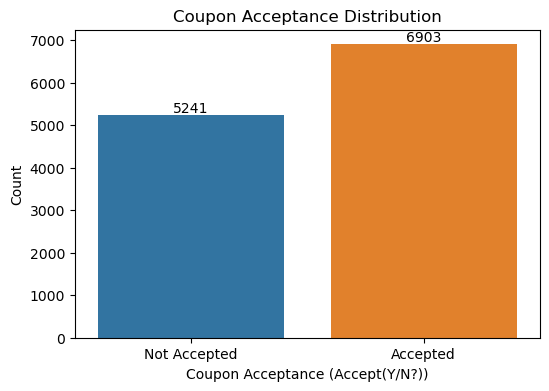

In [ ]:
#Coupon Acceptance Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(data=data, x='Accept(Y/N?)')
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Acceptance (Accept(Y/N?))')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

The output indicates that approximately 6903 of the records correspond to coupon acceptance, while about 5241 correspond to coupon non-acceptance in the dataset and coupon acceptance rate is higher than coupon not acceptance rate.

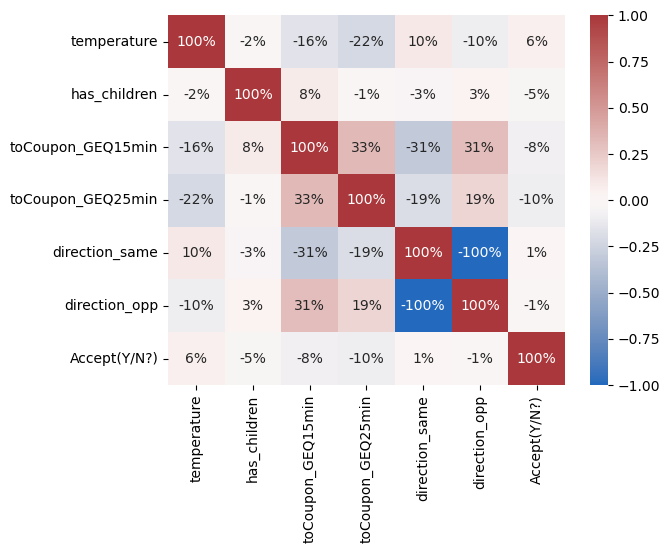

In [ ]:
# Generate and Display Correlation Heatmap for Numeric Features
cmap = sns.color_palette('vlag', as_cmap=True)
sns.heatmap(data.select_dtypes('int64', 'float64').corr(),annot=True,fmt='.0%', cmap=cmap)
plt.show()

from the above Correlation Heatmap we can see that direction_same and direction_opp are highly negatively correlated to each other.Hence we can drop one of this features.here we are dropping direction_opp.  

In [ ]:
data.drop(columns=['direction_opp'], inplace=True)

Let's plot the distribution charts of all the column datatypes except target variable 'Y'.

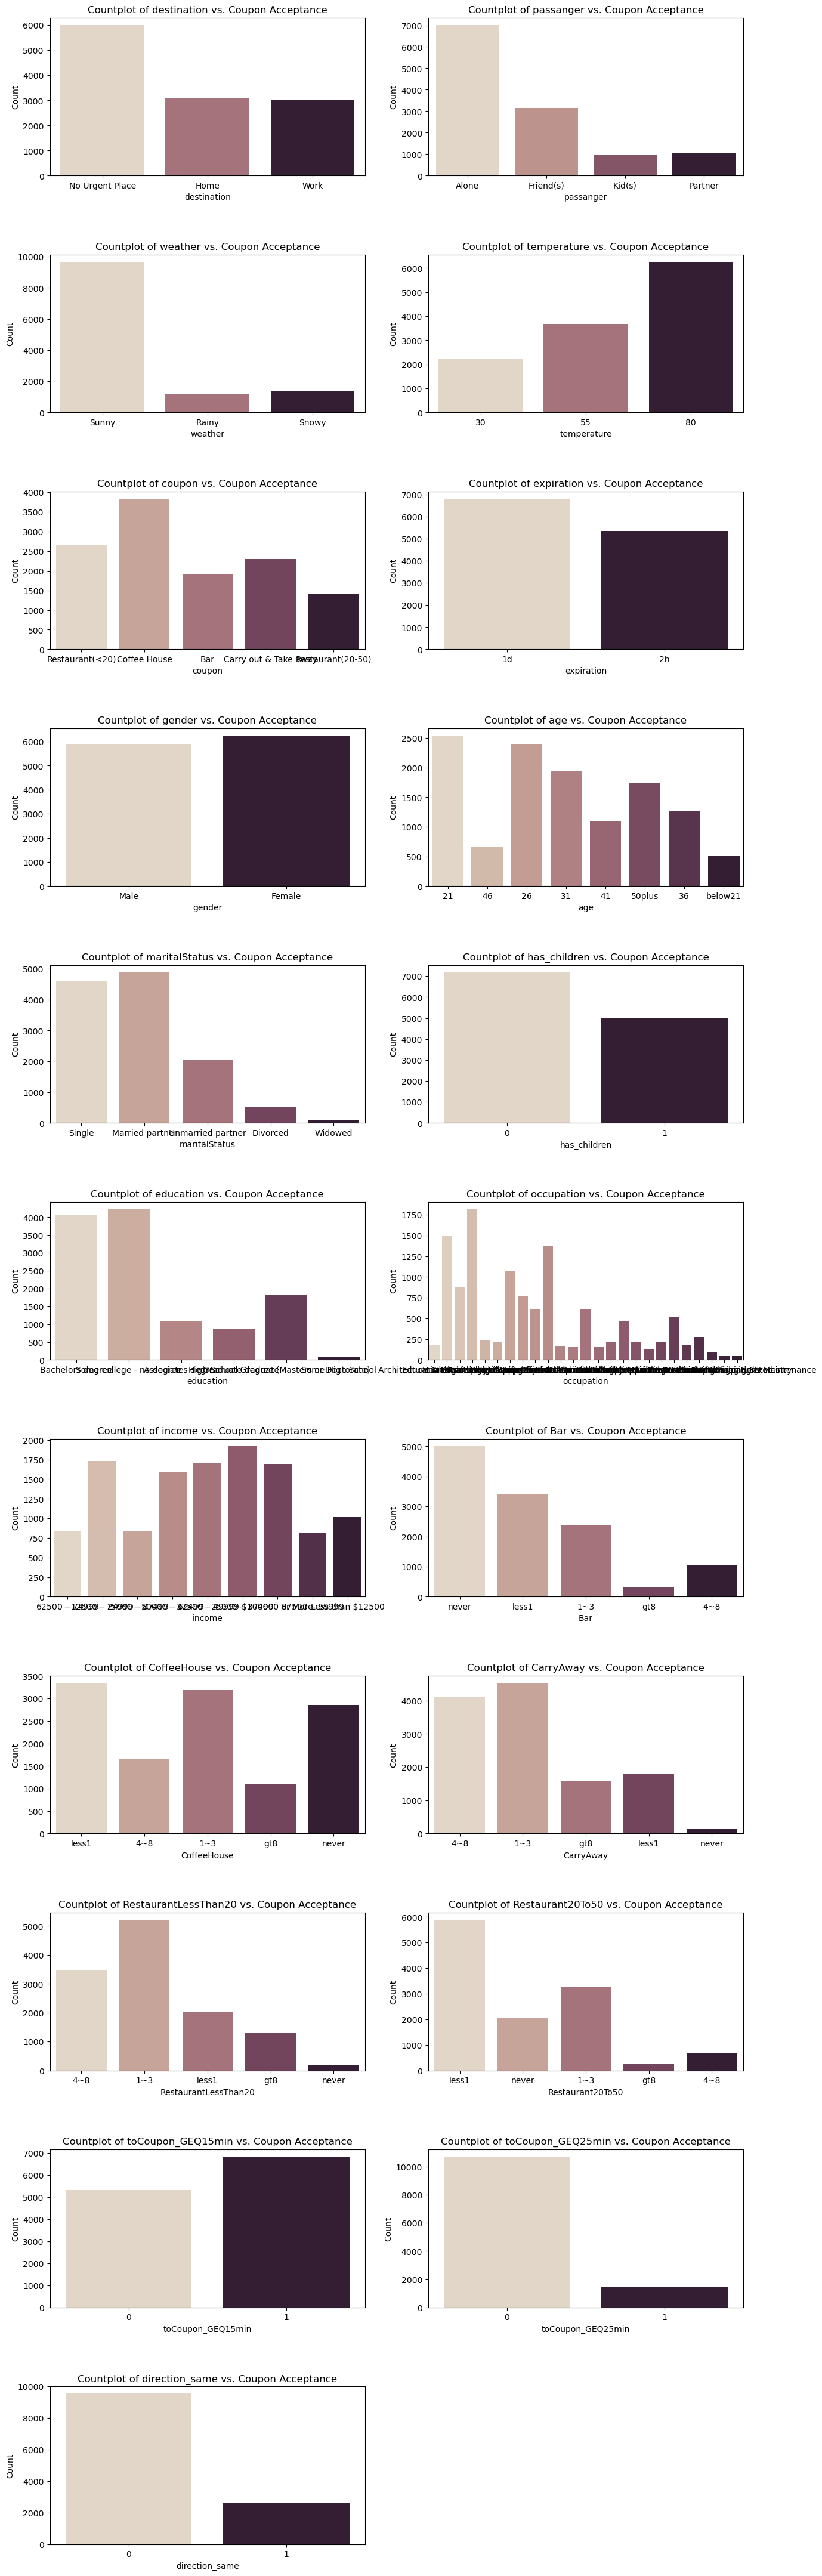

In [ ]:
columns_to_visualize = data.columns.drop('Accept(Y/N?)')

num_rows = len(columns_to_visualize) // 2 + (len(columns_to_visualize) % 2 > 0)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(columns_to_visualize):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]

    sns.countplot(data=data, x=col,ax=ax,palette="ch:.25")
    ax.set_title(f'Countplot of {col} vs. Coupon Acceptance')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

if len(columns_to_visualize) % 2 != 0:
    for i in range(len(columns_to_visualize) % 2, 2):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()

- destination: Most of the drivers are driving to a non urgent place and there are almost equal number of drivers driving to the "Home" and "Work“
- passanger: Almost 90% of the passangers are travelling alone.
- Weather & temperature : The highest number of observations are obtained when the weather was sunny and Temperature is 80F.
- Time: Most of the drivers are driving during the evening between 6PM to 7PM.
- Coupon: Most of the coupons are collected by the drivers from the Coffee House
- Most drivers don't prefer bar. Most drivers visits coffe house, Resturant with avg spending of less than 20 and carry away 1-3 times. Drivers visit less than 1 times to resturant of average spending of 20-30.
- Expiration: The coupons that expire in one day has larger occurance than the coupons expiring in two hour.
- Age: The drivers of the age of 21 and 26 shows the highest occurrence.
- occupation :The "occupation" column has many levels.From the above chart we can see that most of the drivers are unemployed & students.
- gender: This column has almost equal distribution of instances for both male and female drivers.
- maritalStatus: The drivers that are married and single has larger occurances while widowed drivers has very few occurrences.
- education: The drivers with Some college - no degree and Bachelors degree has equal number of occurrences

In [ ]:
coupon_acceptance_rates = data.groupby('passanger')['Accept(Y/N?)'].mean()
print("\nCoupon Acceptance Rates by Passanger Type:")
print(coupon_acceptance_rates)


Coupon Acceptance Rates by Passanger Type:
passanger
Alone        0.525610
Friend(s)    0.675419
Kid(s)       0.500000
Partner      0.594727
Name: Accept(Y/N?), dtype: float64


In [ ]:
coupon_acceptance_rates = data.groupby('weather')['Accept(Y/N?)'].mean()
print("\nCoupon Acceptance Rates by Weather:")
print(coupon_acceptance_rates)


Coupon Acceptance Rates by Weather:
weather
Rainy    0.459343
Snowy    0.473881
Sunny    0.594631
Name: Accept(Y/N?), dtype: float64


In [ ]:
coupon_acceptance_rates = data.groupby('destination')['Accept(Y/N?)'].mean()
print("\nCoupon Acceptance Rates by Destination:")
print(coupon_acceptance_rates)


Coupon Acceptance Rates by Destination:
destination
Home               0.506929
No Urgent Place    0.633394
Work               0.502961
Name: Accept(Y/N?), dtype: float64


In [ ]:
coupon_types_counts = data['coupon'].value_counts()
most_prevalent_coupon_types = coupon_types_counts.index[0]
expiration_times_counts = data['expiration'].value_counts()
most_prevalent_expiration_times = expiration_times_counts.index[0]  # Get the most prevalent expiration time

print("Most Prevalent Coupon Types is:")
print(most_prevalent_coupon_types)

print("\nMost Prevalent Expiration Times is:")
print(most_prevalent_expiration_times)

Most Prevalent Coupon Types is:
Coffee House

Most Prevalent Expiration Times is:
1d


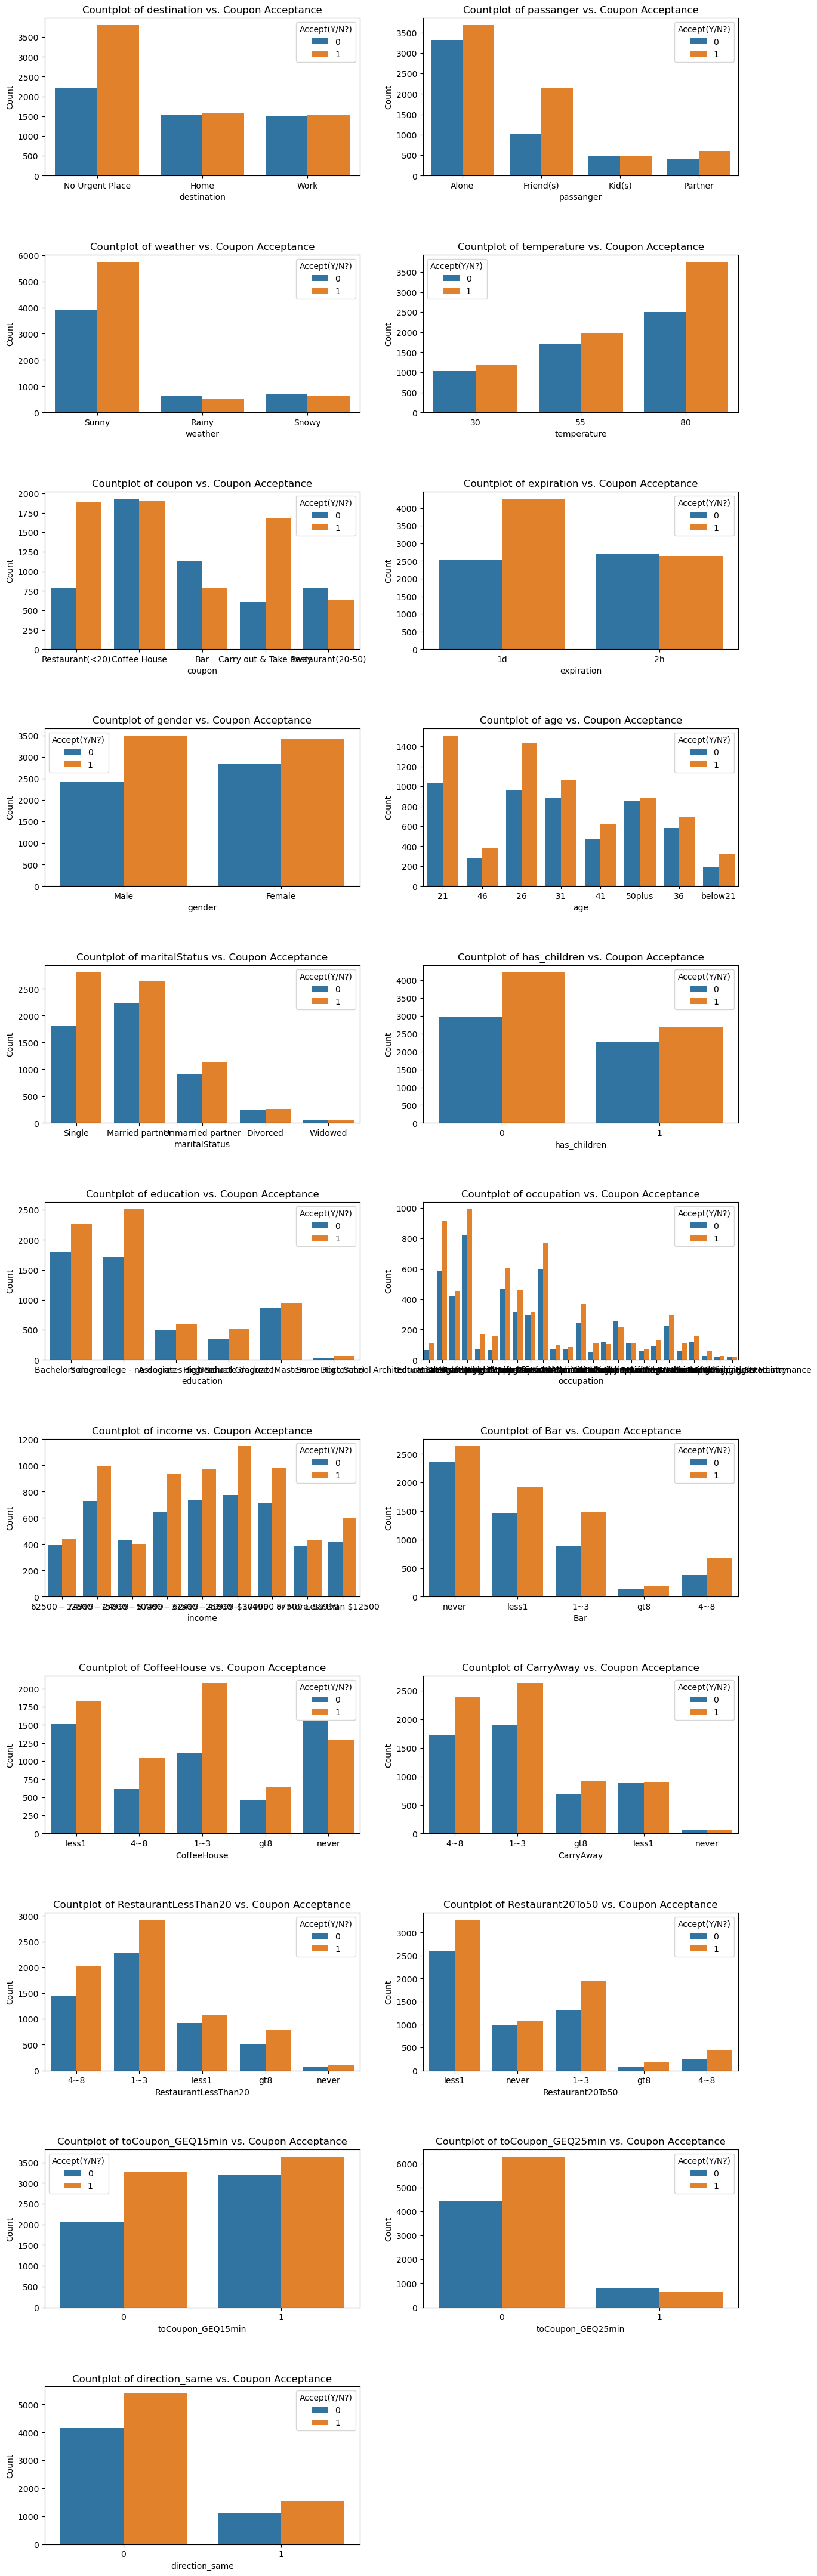

In [ ]:
#distribution of columns based on coupon acceptance
columns_to_visualize = data.columns.drop('Accept(Y/N?)')

num_rows = len(columns_to_visualize) // 2 + (len(columns_to_visualize) % 2 > 0)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(columns_to_visualize):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]

    sns.countplot(data=data, x=col, hue='Accept(Y/N?)', ax=ax)
    ax.set_title(f'Countplot of {col} vs. Coupon Acceptance')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

if len(columns_to_visualize) % 2 != 0:
    for i in range(len(columns_to_visualize) % 2, 2):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()


Insights:
from the above graphs we can see that:
- destination: People that has no urgent place to go has a higher probability to accept the coupon.
- passenger: If the passengers in car are friends of the driver, they are more likely to accept the coupon.
- weather: People tend to accept the coupon when it is sunny
- time: If the time is too early or too late, the probability of accepting the coupon is lower.
- coupon: If the coupon is of a coffee house, the probability of accepting the coupon is just the same as rejecting it. If the coupon is of a cheap restaurant or carry out, most people will accept the coupon.
- expiration: People are more likely to accept a coupon that expires in one day than 2 hr.
- gender: There is no much difference between gender.
- Marital Status: Single and married people are most likely to accept the coupon.
- education: Some college, Bachelor degree users are more likely to accept the coupon.

In [ ]:
df=data[data['Accept(Y/N?)']==1]
table_data = df.groupby(['passanger', 'destination'])['Accept(Y/N?)'].count().reset_index(name='Count')

# Sort the DataFrame by count in descending order
table_data_sorted = table_data.sort_values(by=['passanger','Count','destination'], ascending=False).reset_index(drop=True)

# Display the sorted table
print(table_data_sorted)

   passanger      destination  Count
0    Partner  No Urgent Place    464
1    Partner             Home    145
2     Kid(s)  No Urgent Place    422
3     Kid(s)             Home     53
4  Friend(s)  No Urgent Place   2135
5      Alone             Work   1529
6      Alone             Home   1375
7      Alone  No Urgent Place    780


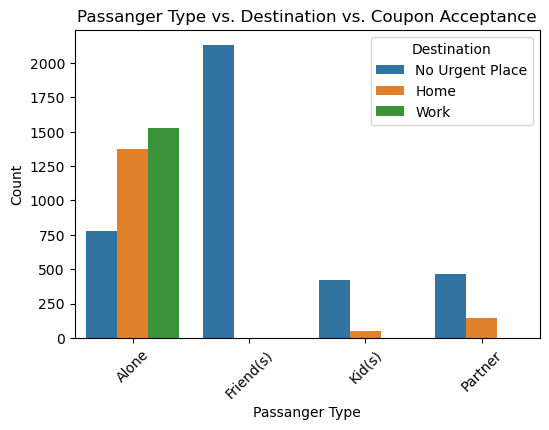

In [ ]:
df=data[data['Accept(Y/N?)']==1]
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='passanger', hue='destination')
plt.title('Passanger Type vs. Destination vs. Coupon Acceptance')
plt.xlabel('Passanger Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Destination', loc='upper right')
plt.show()

insight:
- The majority of passengers travel with friends, especially for "No Urgent Place" destination, with 2,135 occurrences have high probability to accept coupon.
- Users with "Partner" and Kid(s) as passengers mostly head to "Home" and have a relatively very low coupon acceptance count.
- Users traveling "Alone" have a varied choice of destinations but show significant coupon acceptance at "Work" as destination with (1529) and "Home" (1375) coupon acceptance rate.

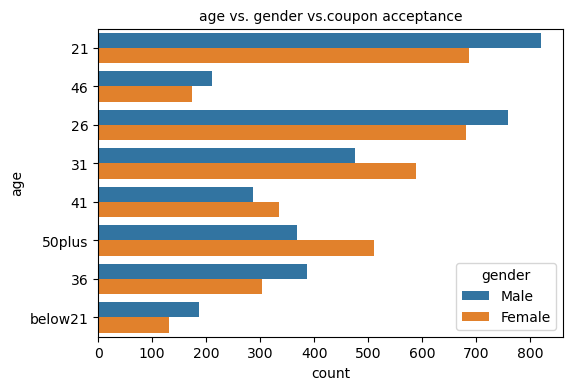

In [ ]:
#Calculate age counts by gender and coupon acceptance
plt.figure(figsize=(6,4))
sns.countplot(y='age',hue='gender',data=df)
plt.title('age vs. gender vs.coupon acceptance', fontsize=10)
plt.xlabel('count')
plt.ylabel('age')
plt.show()

from the above figure wee can see that coupon acceptance rate is high for male users of age 21 & 26.

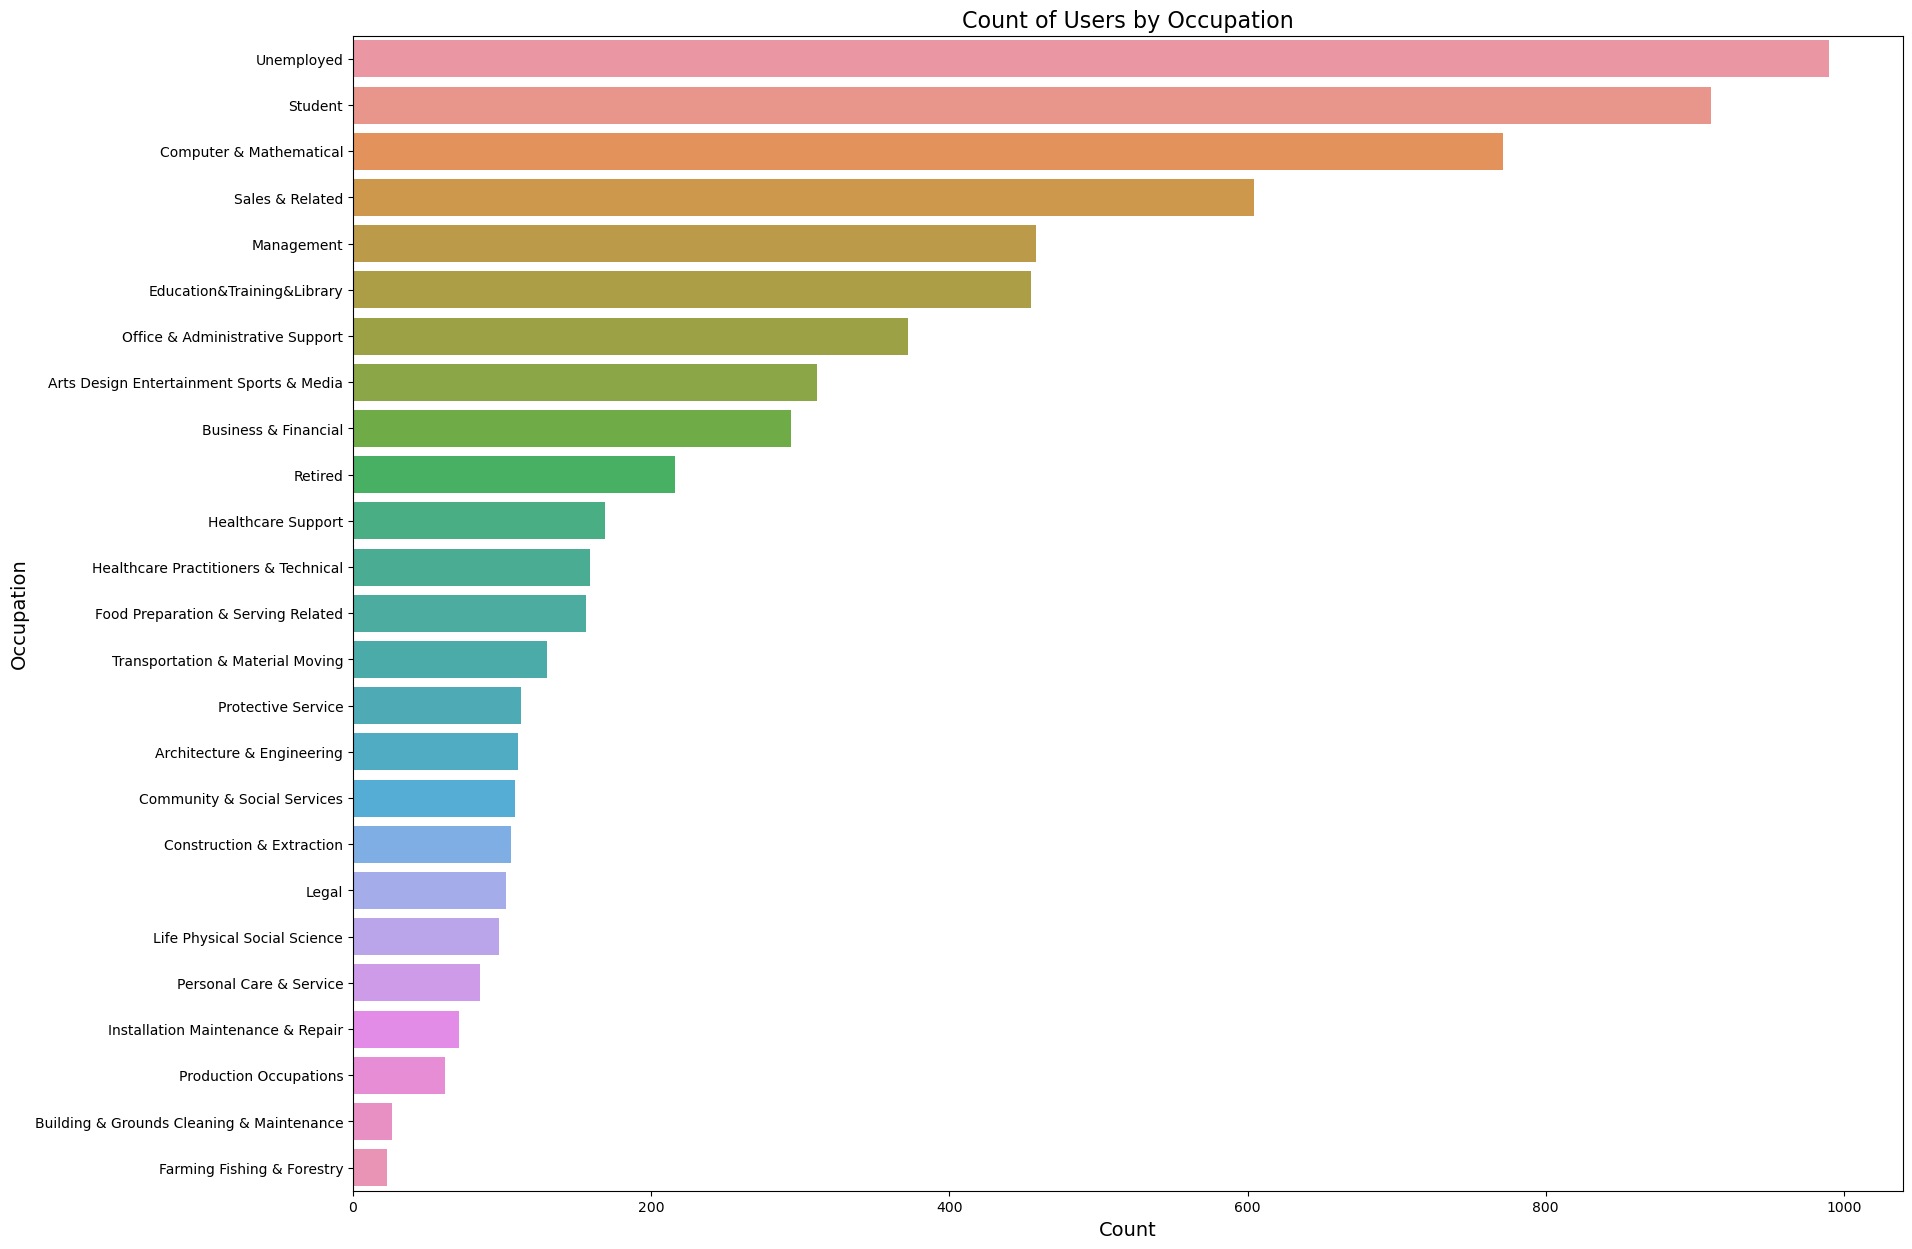

In [ ]:
# Calculate the counts for each occupation category
df=data[data['Accept(Y/N?)']==1]
occupation_counts = df['occupation'].value_counts()
sorted_occupations = occupation_counts.index
plt.figure(figsize=(20, 15))
sns.countplot(y='occupation', data=df, order=sorted_occupations)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupation', fontsize=14)
plt.title('Count of Users by Occupation', fontsize=16)

plt.show()


from the above chart we can see that users who are unemployed & students mostly accepting the coupons.

In [ ]:
table_data = df.groupby(['coupon','expiration'])['Accept(Y/N?)'].count().reset_index(name='Count')
# Sort the DataFrame by count in descending order
table_data_sorted = table_data.sort_values(by=['expiration','coupon','Count'], ascending=False).reset_index(drop=True)
# Display the sorted table
print(table_data_sorted)

                  coupon expiration  Count
0        Restaurant(<20)         2h    803
1      Restaurant(20-50)         2h    157
2           Coffee House         2h    915
3  Carry out & Take away         2h    592
4                    Bar         2h    176
5        Restaurant(<20)         1d   1084
6      Restaurant(20-50)         1d    478
7           Coffee House         1d    989
8  Carry out & Take away         1d   1094
9                    Bar         1d    615


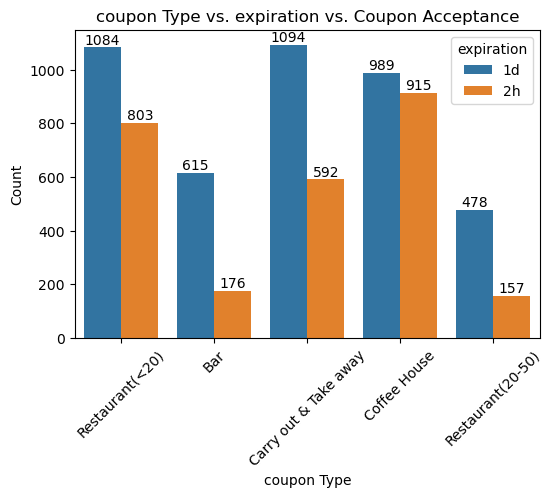

In [ ]:
df=data[data['Accept(Y/N?)']==1]
plt.figure(figsize=(6, 4))
ax=sns.countplot(data=df, x='coupon', hue='expiration')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('coupon Type vs. expiration vs. Coupon Acceptance')
plt.xlabel('coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='expiration', loc='upper right')
plt.show()

insight:
- Coupons with a 2-hour expiration period have the lowest acceptance rate, regardless of coupon type.
- "Coffee House" coupons with a 2-hour expiration have the highest acceptance rate (915) among the 2-hour options.
- Coupons with a 1-day (24-hour) expiration period are more prevalent and have significantly higher acceptance rate, indicating a longer window for acceptance.
- "Carry out & Take away" coupons with a 1-day expiration have the highest acceptance rate (1094) among the 1-day options.

In [ ]:

# Create a pivot table to calculate the count of dining preferences by destination
pivot_table = df.pivot_table(index='destination', columns='RestaurantLessThan20', values='Accept(Y/N?)', aggfunc='count')
print(pivot_table)
# Create a heatmap to visualize the interaction



RestaurantLessThan20   1~3   4~8  gt8  less1  never
destination                                        
Home                   679   452  164    256     22
No Urgent Place       1597  1134  432    581     57
Work                   643   435  185    242     24


Key observations:
- Users with the destination "No Urgent Place" show a higher coupon acceptance rate across various dining preference categories, with "1-3" being the most common followed by "4-8" and "gt8."
- "RestaurantLessThan20" and "1-3" dining preferences are popular among users across all destinations followed by "4-8" .
- Users with the destination "Home" tend to have a higher count in the "less1" and "never" dining preference categories.

-----------------------------------------
no of coupon accepted by destinaton
-----------------------------------------
destination
No Urgent Place    3801
Home               1573
Work               1529
Name: count, dtype: int64
---------------------------------------------
Destination vs. Temperature Interaction Table
---------------------------------------------
temperature       30    55    80
destination                     
Home             368   394   811
No Urgent Place  542  1039  2220
Work             271   541   717


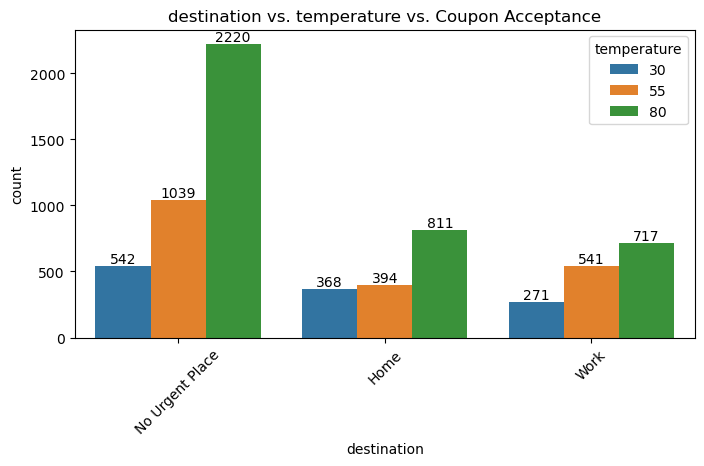

In [ ]:
print('-----------------------------------------')
print('no of coupon accepted by destinaton')
print('-----------------------------------------')
print(df['destination'].value_counts())
print('---------------------------------------------')
print("Destination vs. Temperature Interaction Table")
print('---------------------------------------------')
pivot_table = df.pivot_table(index='destination', columns='temperature', values='Accept(Y/N?)', aggfunc='count')
print(pivot_table)
df=data[data['Accept(Y/N?)']==1]
plt.figure(figsize=(8, 4))
ax=sns.countplot(hue='temperature',x='destination',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('destination vs. temperature vs. Coupon Acceptance')
plt.xlabel('destination')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='temperature',loc='upper right')
plt.show()


Key observations:
- Users with the destination "No Urgent Place"  and 80 temperature show a higher coupon acceptance rate across all destination categories.
- Users with the destination "Home" have relatively balanced counts across temperature categories, with a slightly higher coupon acceptance rate for 80 degrees.
- users with work as destination in 30 temperature have lower coupon acceptance rate.

------------------------------------
destination vs. coupon table
------------------------------------
                   coupon      destination  Count
0         Restaurant(<20)             Work    323
1       Restaurant(20-50)             Work    166
2            Coffee House             Work    386
3   Carry out & Take away             Work    483
4                     Bar             Work    171
5         Restaurant(<20)  No Urgent Place   1298
6       Restaurant(20-50)  No Urgent Place    197
7            Coffee House  No Urgent Place   1195
8   Carry out & Take away  No Urgent Place    711
9                     Bar  No Urgent Place    400
10        Restaurant(<20)             Home    266
11      Restaurant(20-50)             Home    272
12           Coffee House             Home    323
13  Carry out & Take away             Home    492
14                    Bar             Home    220


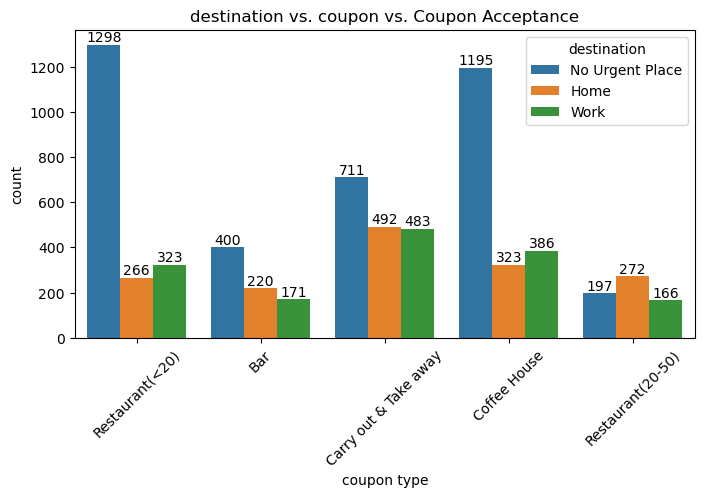

In [ ]:
print('------------------------------------')
print('destination vs. coupon table')
print('------------------------------------')
table_data = df.groupby(['coupon','destination'])['Accept(Y/N?)'].count().reset_index(name='Count')
# Sort the DataFrame by count in descending order
table_data_sorted = table_data.sort_values(by=['destination','coupon','Count'], ascending=False).reset_index(drop=True)
# Display the sorted table
print(table_data_sorted)

df=data[data['Accept(Y/N?)']==1]
plt.figure(figsize=(8, 4))
ax=sns.countplot(hue='destination',x='coupon',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('destination vs. coupon vs. Coupon Acceptance')
plt.xlabel('coupon type')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='destination',loc='upper right')
plt.show()

Users with the destination "No Urgent Place" tend to have higher coupon acceptance counts across various coupon types for "Restaurant(<20)" and "Coffee House" coupons.
 Among the coupon types coupon of "Restaurant(<20)" and "Coffee House" are more commonly accepted across all destinations.


------------------------------------
education vs. gender table
------------------------------------
    gender                               education  Count
0     Male                Some college - no degree   1294
1   Female                Some college - no degree   1214
2     Male                        Some High School     33
3   Female                        Some High School     30
4     Male                    High School Graduate    247
5   Female                    High School Graduate    274
6     Male  Graduate degree (Masters or Doctorate)    462
7   Female  Graduate degree (Masters or Doctorate)    490
8     Male                        Bachelors degree   1170
9   Female                        Bachelors degree   1092
10    Male                       Associates degree    286
11  Female                       Associates degree    311


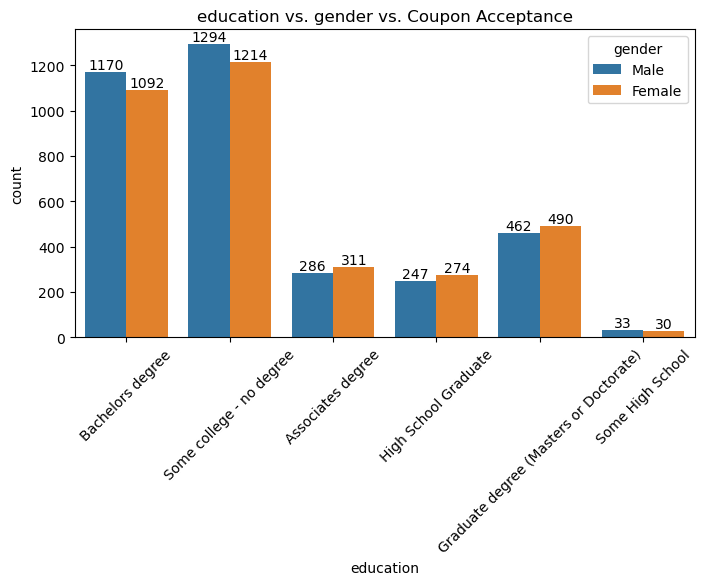

In [ ]:
print('------------------------------------')
print('education vs. gender table')
print('------------------------------------')
table_data = df.groupby(['gender','education'])['Accept(Y/N?)'].count().reset_index(name='Count')
# Sort the DataFrame by count in descending order
table_data_sorted = table_data.sort_values(by=['education','gender','Count'], ascending=False).reset_index(drop=True)
# Display the sorted table
print(table_data_sorted)

df=data[data['Accept(Y/N?)']==1]
plt.figure(figsize=(8, 4))
ax=sns.countplot(hue='gender',x='education',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('education vs. gender vs. Coupon Acceptance')
plt.xlabel('education')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='gender',loc='upper right')
plt.show()

from the above chart we can see that,male users with "some college-no degree" education level followed by female users with same education level are mostly accepting coupons.we can conclude that user with education level as "some college-no degree" and "Bachelors degree are approximately same in coupon acceptance rate.

Countplots of Dining Preferences


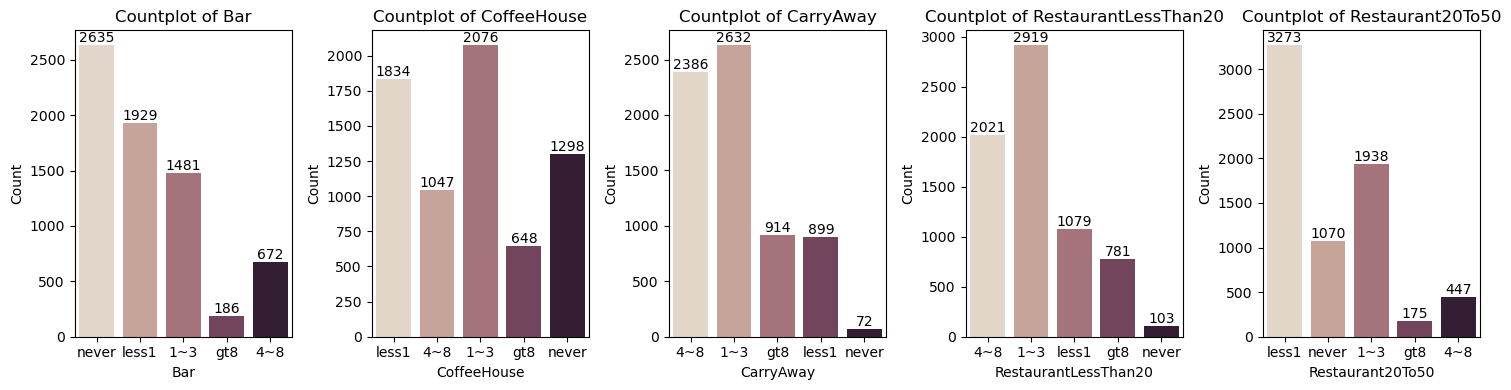

In [ ]:
variables_to_plot = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
df=data[data['Accept(Y/N?)']==1]
# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_plot), figsize=(15, 4))

# Plot countplots for each variable
for i, var in enumerate(variables_to_plot):
    ax=sns.countplot(data=df, x=var, ax=axes[i],palette="ch:.25")
    for bars in ax.containers:
        ax.bar_label(bars)
    axes[i].set_title(f'Countplot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
print("Countplots of Dining Preferences")
plt.show()

insight:
- most users don't prefer bar.
- most users visits coffe house,Resturant with avg spending of less than 20 and carry away 1-3 times. users visit less than 1 times to resturant of average spending of 20-30.

In [ ]:
#converting age column to numeric data type for better accuracy.replacing below21 with 20 and 50plus with 51.
data['age'].replace({'below21':20,'50plus':51,'21':21,'26':26,'31':31,'36':36,'41':41,'46':46},inplace=True)
data['age'].dtype

dtype('int64')

In [ ]:
data['age'].value_counts()

age
21    2537
26    2399
31    1946
51    1732
36    1275
41    1087
46     664
20     504
Name: count, dtype: int64

In [ ]:
clean_data=data.copy()

## Data Modeling

In [ ]:
data.shape

(12144, 22)

In [ ]:
#importing necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

## ONE-HOT ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=['Accept(Y/N?)'])
Y = data['Accept(Y/N?)']
data1 = ['destination', 'passanger','weather', 'coupon', 'expiration', 'gender', 'maritalStatus',
                       'education', 'occupation','income','Bar', 'CoffeeHouse', 'CarryAway',
                        'RestaurantLessThan20','Restaurant20To50']

X_encoded = pd.get_dummies(X, columns=data1,drop_first=True)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)
# Standardize numeric features
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print('x_train data_size: ',X_train.shape)
print('y_train data_size: ',Y_train.shape)
print('x_test data_size: ',X_test.shape)
print('y_test data_size: ',Y_test.shape)

x_train data_size:  (9715, 80)
y_train data_size:  (9715,)
x_test data_size:  (2429, 80)
y_test data_size:  (2429,)


In [ ]:
print(X_encoded.shape)
X_encoded.head(5)

(12144, 80)


,temperature,age,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
22,55,21,0,0,0,0,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False
23,80,21,0,0,0,0,True,False,True,False,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False
24,80,21,0,0,0,0,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False
25,80,21,0,1,0,0,True,False,True,False,False,False,True,True,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False
26,80,21,0,0,0,0,True,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

## RANDOM FOREST  MODEL

In [ ]:
model1 = RandomForestClassifier(random_state=42)

In [ ]:
model1.set_params(criterion = 'gini',
                  max_features = None,
                  max_depth = 12,
                 min_samples_leaf=1,min_samples_split=2)

RandomForestClassifier(max_depth=12, max_features=None, random_state=42)

In [ ]:
model1.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False,
                 oob_score=True)


RandomForestClassifier(max_depth=12, max_features=None, n_estimators=200,
                       oob_score=True, random_state=42)

In [ ]:
model1.fit(X_train,Y_train)
print(model1.score(X_train, Y_train))
y_pred=model1.predict(X_test)

0.8988162635100361


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy=',accuracy)
precision=precision_score(Y_test,y_pred)
print('precision =',precision)
recall=recall_score(Y_test,y_pred)
print('recall=',recall)

accuracy= 0.7496912309592425
precision = 0.7564698075646981
recall= 0.8254887762490949


## Logistic regression model

In [ ]:
model2 = LogisticRegression(max_iter=500, random_state=42)

# Train the model on the training data
model2.fit(X_train, Y_train)
print(model2.score(X_train, Y_train))

# Make predictions on the test data
Y_pred = model2.predict(X_test)

# Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:\n', class_report)

0.692125579001544
Accuracy: 74.97%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      1048
           1       0.76      0.83      0.79      1381

    accuracy                           0.75      2429
   macro avg       0.75      0.74      0.74      2429
weighted avg       0.75      0.75      0.75      2429



## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model3 = XGBClassifier(
    max_depth=4,
    learning_rate=0.2,
    n_estimators=500,
    seed=42)

# Train the model on the training data
model3.fit(X_train, Y_train)
print(model3.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

0.8749356664951107


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1048
           1       0.78      0.82      0.80      1381

    accuracy                           0.76      2429
   macro avg       0.76      0.75      0.76      2429
weighted avg       0.76      0.76      0.76      2429



## SVM model

In [ ]:
from sklearn.svm import SVC

In [ ]:
model4 = SVC(kernel='rbf',gamma=0.2, probability=True, cache_size=500, random_state=None)
model4.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model4.predict(X_test)
print(model4.score(X_train, Y_train))

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
classification_report_str = classification_report(Y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)

0.9902213072568193
Accuracy: 0.6422396047756278
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.28      0.40      1048
           1       0.63      0.92      0.74      1381

    accuracy                           0.64      2429
   macro avg       0.67      0.60      0.57      2429
weighted avg       0.67      0.64      0.60      2429



## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=3000, random_state=42)
model5.fit(X_train, Y_train)
print(model5.score(X_train, Y_train))

# Make predictions on the test set
y_pred = model5.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed evaluation
classification_rep = classification_report(Y_test, y_pred)
print('Classification Report:\n', classification_rep)

0.8668039114770972
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1048
           1       0.78      0.82      0.80      1381

    accuracy                           0.77      2429
   macro avg       0.76      0.76      0.76      2429
weighted avg       0.76      0.77      0.76      2429



## CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

model6 = CatBoostClassifier(iterations=400, depth=4, learning_rate=0.19, loss_function='Logloss', random_seed=42)

# Train the model on the training data
model6.fit(X_train, Y_train)
print(model6.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model6.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
classification_report_str = classification_report(Y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)

0:	learn: 0.6672373	total: 5.19ms	remaining: 2.07s
1:	learn: 0.6508975	total: 10.5ms	remaining: 2.09s
2:	learn: 0.6410123	total: 15.1ms	remaining: 2s
3:	learn: 0.6325754	total: 19.6ms	remaining: 1.94s
4:	learn: 0.6258790	total: 24.3ms	remaining: 1.92s
5:	learn: 0.6210130	total: 29.4ms	remaining: 1.93s
6:	learn: 0.6168516	total: 34.9ms	remaining: 1.96s
7:	learn: 0.6137384	total: 40.1ms	remaining: 1.97s
8:	learn: 0.6073567	total: 45.2ms	remaining: 1.96s
9:	learn: 0.6047822	total: 50ms	remaining: 1.95s
10:	learn: 0.6014776	total: 55.3ms	remaining: 1.96s
11:	learn: 0.5988329	total: 59.9ms	remaining: 1.94s
12:	learn: 0.5964643	total: 64.4ms	remaining: 1.92s
13:	learn: 0.5948761	total: 69.7ms	remaining: 1.92s
14:	learn: 0.5935339	total: 74.9ms	remaining: 1.92s
15:	learn: 0.5919420	total: 79.9ms	remaining: 1.92s
16:	learn: 0.5902035	total: 84.8ms	remaining: 1.91s
17:	learn: 0.5891425	total: 89.2ms	remaining: 1.89s
18:	learn: 0.5864861	total: 94.2ms	remaining: 1.89s
19:	learn: 0.5852921	total:

165:	learn: 0.4763601	total: 813ms	remaining: 1.15s
166:	learn: 0.4758690	total: 818ms	remaining: 1.14s
167:	learn: 0.4754311	total: 823ms	remaining: 1.14s
168:	learn: 0.4750555	total: 828ms	remaining: 1.13s
169:	learn: 0.4746536	total: 833ms	remaining: 1.13s
170:	learn: 0.4742725	total: 839ms	remaining: 1.12s
171:	learn: 0.4739651	total: 844ms	remaining: 1.12s
172:	learn: 0.4735232	total: 850ms	remaining: 1.11s
173:	learn: 0.4731029	total: 854ms	remaining: 1.11s
174:	learn: 0.4727121	total: 859ms	remaining: 1.1s
175:	learn: 0.4724179	total: 872ms	remaining: 1.11s
176:	learn: 0.4719679	total: 878ms	remaining: 1.1s
177:	learn: 0.4715616	total: 882ms	remaining: 1.1s
178:	learn: 0.4711353	total: 887ms	remaining: 1.09s
179:	learn: 0.4705606	total: 892ms	remaining: 1.09s
180:	learn: 0.4701076	total: 897ms	remaining: 1.08s
181:	learn: 0.4695603	total: 901ms	remaining: 1.08s
182:	learn: 0.4691159	total: 906ms	remaining: 1.07s
183:	learn: 0.4687964	total: 910ms	remaining: 1.07s
184:	learn: 0.4

365:	learn: 0.4103092	total: 1.78s	remaining: 165ms
366:	learn: 0.4100589	total: 1.78s	remaining: 160ms
367:	learn: 0.4097275	total: 1.79s	remaining: 156ms
368:	learn: 0.4095107	total: 1.79s	remaining: 151ms
369:	learn: 0.4092623	total: 1.8s	remaining: 146ms
370:	learn: 0.4089969	total: 1.8s	remaining: 141ms
371:	learn: 0.4088191	total: 1.81s	remaining: 136ms
372:	learn: 0.4086756	total: 1.81s	remaining: 131ms
373:	learn: 0.4085378	total: 1.82s	remaining: 126ms
374:	learn: 0.4083098	total: 1.82s	remaining: 122ms
375:	learn: 0.4079795	total: 1.83s	remaining: 117ms
376:	learn: 0.4076560	total: 1.83s	remaining: 112ms
377:	learn: 0.4074080	total: 1.84s	remaining: 107ms
378:	learn: 0.4072014	total: 1.84s	remaining: 102ms
379:	learn: 0.4070468	total: 1.84s	remaining: 97.1ms
380:	learn: 0.4068912	total: 1.85s	remaining: 92.2ms
381:	learn: 0.4066889	total: 1.85s	remaining: 87.4ms
382:	learn: 0.4064962	total: 1.86s	remaining: 82.5ms
383:	learn: 0.4061744	total: 1.86s	remaining: 77.6ms
384:	lear

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.76

Confusion Matrix:
[[ 700  348]
 [ 231 1150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1048
           1       0.77      0.83      0.80      1381

    accuracy                           0.76      2429
   macro avg       0.76      0.75      0.75      2429
weighted avg       0.76      0.76      0.76      2429



In [ ]:
# Calculate accuracy, F1 score, and AUC of all models

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model_metrics = []

models = [('RandomForestClassifier',model1),('LogisticRegression',model2),('XGboost',model3),('SVM',model4),
          ('Gradient Boosting',model5),('CatBoostClassifier',model6)]

for model_name, model in models:
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_prob)

    model_metrics.append([model_name, accuracy, f1, auc])
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'Accuracy', 'F1 Score', 'AUC'])


0:	learn: 0.6672373	total: 4.59ms	remaining: 1.83s
1:	learn: 0.6508975	total: 10.1ms	remaining: 2s
2:	learn: 0.6410123	total: 15ms	remaining: 1.99s
3:	learn: 0.6325754	total: 19.9ms	remaining: 1.97s
4:	learn: 0.6258790	total: 24.6ms	remaining: 1.94s
5:	learn: 0.6210130	total: 29.7ms	remaining: 1.95s
6:	learn: 0.6168516	total: 35ms	remaining: 1.97s
7:	learn: 0.6137384	total: 40.2ms	remaining: 1.97s
8:	learn: 0.6073567	total: 45.2ms	remaining: 1.96s
9:	learn: 0.6047822	total: 50.3ms	remaining: 1.96s
10:	learn: 0.6014776	total: 55.4ms	remaining: 1.96s
11:	learn: 0.5988329	total: 60ms	remaining: 1.94s
12:	learn: 0.5964643	total: 64.3ms	remaining: 1.91s
13:	learn: 0.5948761	total: 69.2ms	remaining: 1.91s
14:	learn: 0.5935339	total: 73.9ms	remaining: 1.9s
15:	learn: 0.5919420	total: 78.8ms	remaining: 1.89s
16:	learn: 0.5902035	total: 83.2ms	remaining: 1.87s
17:	learn: 0.5891425	total: 87.7ms	remaining: 1.86s
18:	learn: 0.5864861	total: 92.4ms	remaining: 1.85s
19:	learn: 0.5852921	total: 97.4

165:	learn: 0.4763601	total: 799ms	remaining: 1.13s
166:	learn: 0.4758690	total: 804ms	remaining: 1.12s
167:	learn: 0.4754311	total: 810ms	remaining: 1.12s
168:	learn: 0.4750555	total: 816ms	remaining: 1.11s
169:	learn: 0.4746536	total: 822ms	remaining: 1.11s
170:	learn: 0.4742725	total: 827ms	remaining: 1.11s
171:	learn: 0.4739651	total: 832ms	remaining: 1.1s
172:	learn: 0.4735232	total: 838ms	remaining: 1.1s
173:	learn: 0.4731029	total: 843ms	remaining: 1.09s
174:	learn: 0.4727121	total: 848ms	remaining: 1.09s
175:	learn: 0.4724179	total: 853ms	remaining: 1.08s
176:	learn: 0.4719679	total: 858ms	remaining: 1.08s
177:	learn: 0.4715616	total: 863ms	remaining: 1.08s
178:	learn: 0.4711353	total: 869ms	remaining: 1.07s
179:	learn: 0.4705606	total: 874ms	remaining: 1.07s
180:	learn: 0.4701076	total: 879ms	remaining: 1.06s
181:	learn: 0.4695603	total: 883ms	remaining: 1.06s
182:	learn: 0.4691159	total: 889ms	remaining: 1.05s
183:	learn: 0.4687964	total: 893ms	remaining: 1.05s
184:	learn: 0.

361:	learn: 0.4111126	total: 1.81s	remaining: 190ms
362:	learn: 0.4108671	total: 1.81s	remaining: 185ms
363:	learn: 0.4106609	total: 1.82s	remaining: 180ms
364:	learn: 0.4104967	total: 1.82s	remaining: 175ms
365:	learn: 0.4103092	total: 1.83s	remaining: 170ms
366:	learn: 0.4100589	total: 1.83s	remaining: 165ms
367:	learn: 0.4097275	total: 1.84s	remaining: 160ms
368:	learn: 0.4095107	total: 1.84s	remaining: 155ms
369:	learn: 0.4092623	total: 1.85s	remaining: 150ms
370:	learn: 0.4089969	total: 1.85s	remaining: 145ms
371:	learn: 0.4088191	total: 1.86s	remaining: 140ms
372:	learn: 0.4086756	total: 1.86s	remaining: 135ms
373:	learn: 0.4085378	total: 1.87s	remaining: 130ms
374:	learn: 0.4083098	total: 1.88s	remaining: 125ms
375:	learn: 0.4079795	total: 1.88s	remaining: 120ms
376:	learn: 0.4076560	total: 1.89s	remaining: 115ms
377:	learn: 0.4074080	total: 1.89s	remaining: 110ms
378:	learn: 0.4072014	total: 1.89s	remaining: 105ms
379:	learn: 0.4070468	total: 1.9s	remaining: 100ms
380:	learn: 0

In [ ]:
# Display the table of model performance metrics
print(metrics_df)

                    Model  Accuracy  F1 Score       AUC
0  RandomForestClassifier  0.749691  0.789474  0.809592
1      LogisticRegression  0.690408  0.736325  0.738928
2                 XGboost  0.762865  0.796466  0.832464
3                     SVM  0.642240  0.744337  0.730572
4       Gradient Boosting  0.765747  0.798869  0.829052
5      CatBoostClassifier  0.761630  0.798889  0.831507


Based on the table above, it is evident that the XGBoost,CATBoost and gradient Boosting models with one-hot-encoding exhibit the highest accuracy compared to the other models.Now we are going to perform hyper parameter tuning on these 3 models.

## Hyperparameter Tuning

In [ ]:
#Hyper parameter tuning of XGB classifier
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4],
    'n_estimators': [400,500]}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
print(best_params)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
# Evaluate the model's performance using best parameters of hyperparameter Tuning
model3 = XGBClassifier(
    max_depth=4,
    learning_rate=0.2,
    n_estimators=500,
    seed=42)

# Train the model on the training data
model3.fit(X_train, Y_train)
print('Train_accuray: ',model3.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
print(f"Test_Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)

Train_accuray:  0.8749356664951107
Test_Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1048
           1       0.78      0.82      0.80      1381

    accuracy                           0.76      2429
   macro avg       0.76      0.75      0.76      2429
weighted avg       0.76      0.76      0.76      2429



In [ ]:
#Hyper parameter Tuning of Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [400,500],
    'learning_rate': [0.01, 0.1, 0.07,0.2],
    'max_depth': [3, 4]}
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)


{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 400}


In [ ]:
# Train a Gradient Boosting classifier with the best hyperparameters
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=400, random_state=42,learning_rate=0.2,max_depth=4)
model5.fit(X_train, Y_train)
print(model5.score(X_train, Y_train))

# Make predictions on the test set
y_pred = model5.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed evaluation
classification_rep = classification_report(Y_test, y_pred)
print('Classification Report:\n', classification_rep)

0.8759650025733402
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      1048
           1       0.77      0.82      0.80      1381

    accuracy                           0.76      2429
   macro avg       0.76      0.75      0.75      2429
weighted avg       0.76      0.76      0.76      2429



In [ ]:
#hyperparameter tuning of catboost classifier
from catboost import CatBoostClassifier, Pool

catboost_model = CatBoostClassifier(loss_function='Logloss',
                                    random_seed=42,
                                    verbose=0)
param_grid = {
    'iterations': [100, 200, 300,600],
    'learning_rate': [0.01,0.13, 0.02],
    'depth': [4]}
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)


{'depth': 4, 'iterations': 600, 'learning_rate': 0.13}


In [ ]:
from catboost import CatBoostClassifier

model6 = CatBoostClassifier(iterations=600, depth=4, learning_rate=0.13, loss_function='Logloss', random_seed=42)

# Train the model on the training data
model6.fit(X_train, Y_train)
print(model6.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model6.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
classification_report_str = classification_report(Y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)


0:	learn: 0.6747351	total: 6.66ms	remaining: 3.99s
1:	learn: 0.6618672	total: 12.9ms	remaining: 3.84s
2:	learn: 0.6496398	total: 19.2ms	remaining: 3.82s
3:	learn: 0.6406086	total: 31.6ms	remaining: 4.71s
4:	learn: 0.6336264	total: 37.3ms	remaining: 4.44s
5:	learn: 0.6283932	total: 42.8ms	remaining: 4.24s
6:	learn: 0.6241048	total: 48.4ms	remaining: 4.1s
7:	learn: 0.6210483	total: 53.9ms	remaining: 3.99s
8:	learn: 0.6189974	total: 60.3ms	remaining: 3.96s
9:	learn: 0.6154066	total: 66.8ms	remaining: 3.94s
10:	learn: 0.6130128	total: 72.3ms	remaining: 3.87s
11:	learn: 0.6104018	total: 77.9ms	remaining: 3.82s
12:	learn: 0.6087795	total: 83.6ms	remaining: 3.78s
13:	learn: 0.6069908	total: 90ms	remaining: 3.77s
14:	learn: 0.6054070	total: 96.3ms	remaining: 3.75s
15:	learn: 0.6043270	total: 103ms	remaining: 3.77s
16:	learn: 0.6030437	total: 108ms	remaining: 3.71s
17:	learn: 0.6017816	total: 114ms	remaining: 3.68s
18:	learn: 0.5983422	total: 118ms	remaining: 3.62s
19:	learn: 0.5967810	total: 1

183:	learn: 0.4964819	total: 1.24s	remaining: 2.8s
184:	learn: 0.4962719	total: 1.25s	remaining: 2.79s
185:	learn: 0.4960309	total: 1.25s	remaining: 2.78s
186:	learn: 0.4956363	total: 1.26s	remaining: 2.78s
187:	learn: 0.4953579	total: 1.26s	remaining: 2.77s
188:	learn: 0.4950364	total: 1.27s	remaining: 2.76s
189:	learn: 0.4947001	total: 1.28s	remaining: 2.75s
190:	learn: 0.4942981	total: 1.28s	remaining: 2.75s
191:	learn: 0.4939685	total: 1.29s	remaining: 2.74s
192:	learn: 0.4935049	total: 1.3s	remaining: 2.74s
193:	learn: 0.4932313	total: 1.31s	remaining: 2.73s
194:	learn: 0.4930066	total: 1.31s	remaining: 2.73s
195:	learn: 0.4925044	total: 1.32s	remaining: 2.72s
196:	learn: 0.4919763	total: 1.32s	remaining: 2.71s
197:	learn: 0.4916838	total: 1.33s	remaining: 2.7s
198:	learn: 0.4914469	total: 1.34s	remaining: 2.69s
199:	learn: 0.4910110	total: 1.35s	remaining: 2.7s
200:	learn: 0.4905786	total: 1.35s	remaining: 2.69s
201:	learn: 0.4903243	total: 1.36s	remaining: 2.68s
202:	learn: 0.48

364:	learn: 0.4445523	total: 2.49s	remaining: 1.6s
365:	learn: 0.4443230	total: 2.49s	remaining: 1.59s
366:	learn: 0.4441990	total: 2.5s	remaining: 1.59s
367:	learn: 0.4439161	total: 2.5s	remaining: 1.58s
368:	learn: 0.4435724	total: 2.52s	remaining: 1.58s
369:	learn: 0.4432958	total: 2.53s	remaining: 1.57s
370:	learn: 0.4429935	total: 2.53s	remaining: 1.56s
371:	learn: 0.4428088	total: 2.54s	remaining: 1.56s
372:	learn: 0.4425350	total: 2.55s	remaining: 1.55s
373:	learn: 0.4422689	total: 2.55s	remaining: 1.54s
374:	learn: 0.4420663	total: 2.56s	remaining: 1.53s
375:	learn: 0.4418882	total: 2.56s	remaining: 1.53s
376:	learn: 0.4417207	total: 2.57s	remaining: 1.52s
377:	learn: 0.4414051	total: 2.58s	remaining: 1.51s
378:	learn: 0.4412115	total: 2.58s	remaining: 1.51s
379:	learn: 0.4410671	total: 2.59s	remaining: 1.5s
380:	learn: 0.4408765	total: 2.6s	remaining: 1.49s
381:	learn: 0.4406402	total: 2.6s	remaining: 1.49s
382:	learn: 0.4404224	total: 2.61s	remaining: 1.48s
383:	learn: 0.4401

542:	learn: 0.4099174	total: 3.71s	remaining: 389ms
543:	learn: 0.4097279	total: 3.71s	remaining: 382ms
544:	learn: 0.4095601	total: 3.72s	remaining: 375ms
545:	learn: 0.4092580	total: 3.72s	remaining: 368ms
546:	learn: 0.4090824	total: 3.73s	remaining: 362ms
547:	learn: 0.4089296	total: 3.74s	remaining: 355ms
548:	learn: 0.4087497	total: 3.74s	remaining: 348ms
549:	learn: 0.4086521	total: 3.75s	remaining: 341ms
550:	learn: 0.4084543	total: 3.75s	remaining: 334ms
551:	learn: 0.4082565	total: 3.76s	remaining: 327ms
552:	learn: 0.4081375	total: 3.77s	remaining: 320ms
553:	learn: 0.4078661	total: 3.77s	remaining: 313ms
554:	learn: 0.4076661	total: 3.78s	remaining: 307ms
555:	learn: 0.4075247	total: 3.79s	remaining: 300ms
556:	learn: 0.4073084	total: 3.8s	remaining: 293ms
557:	learn: 0.4071475	total: 3.81s	remaining: 286ms
558:	learn: 0.4070463	total: 3.81s	remaining: 280ms
559:	learn: 0.4067581	total: 3.82s	remaining: 273ms
560:	learn: 0.4066408	total: 3.83s	remaining: 266ms
561:	learn: 0

In [ ]:
# after hyper parameter tuning accuracy, F1 score, and AUC of all models

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model_metrics = []

models = [('RandomForestClassifier',model1),('LogisticRegression',model2),('XGboost',model3),('SVM',model4),
          ('Gradient Boosting',model5),('CatBoostClassifier',model6)]

for model_name, model in models:
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_prob)

    model_metrics.append([model_name, accuracy, f1, auc])
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'Accuracy', 'F1 Score', 'AUC'])


0:	learn: 0.6747351	total: 6.71ms	remaining: 4.02s
1:	learn: 0.6618672	total: 12.8ms	remaining: 3.84s
2:	learn: 0.6496398	total: 19.1ms	remaining: 3.79s
3:	learn: 0.6406086	total: 24.7ms	remaining: 3.67s
4:	learn: 0.6336264	total: 30.8ms	remaining: 3.67s
5:	learn: 0.6283932	total: 36.3ms	remaining: 3.59s
6:	learn: 0.6241048	total: 41.7ms	remaining: 3.54s
7:	learn: 0.6210483	total: 47.4ms	remaining: 3.51s
8:	learn: 0.6189974	total: 52.6ms	remaining: 3.45s
9:	learn: 0.6154066	total: 57.3ms	remaining: 3.38s
10:	learn: 0.6130128	total: 62.9ms	remaining: 3.37s
11:	learn: 0.6104018	total: 67.8ms	remaining: 3.32s
12:	learn: 0.6087795	total: 73ms	remaining: 3.3s
13:	learn: 0.6069908	total: 78.7ms	remaining: 3.29s
14:	learn: 0.6054070	total: 84.5ms	remaining: 3.3s
15:	learn: 0.6043270	total: 90.1ms	remaining: 3.29s
16:	learn: 0.6030437	total: 100ms	remaining: 3.44s
17:	learn: 0.6017816	total: 116ms	remaining: 3.76s
18:	learn: 0.5983422	total: 121ms	remaining: 3.7s
19:	learn: 0.5967810	total: 12

178:	learn: 0.4983482	total: 1.2s	remaining: 2.83s
179:	learn: 0.4980845	total: 1.21s	remaining: 2.82s
180:	learn: 0.4977732	total: 1.22s	remaining: 2.81s
181:	learn: 0.4972179	total: 1.22s	remaining: 2.8s
182:	learn: 0.4968485	total: 1.23s	remaining: 2.8s
183:	learn: 0.4964819	total: 1.23s	remaining: 2.79s
184:	learn: 0.4962719	total: 1.24s	remaining: 2.78s
185:	learn: 0.4960309	total: 1.25s	remaining: 2.78s
186:	learn: 0.4956363	total: 1.26s	remaining: 2.77s
187:	learn: 0.4953579	total: 1.26s	remaining: 2.77s
188:	learn: 0.4950364	total: 1.28s	remaining: 2.79s
189:	learn: 0.4947001	total: 1.29s	remaining: 2.78s
190:	learn: 0.4942981	total: 1.31s	remaining: 2.81s
191:	learn: 0.4939685	total: 1.32s	remaining: 2.8s
192:	learn: 0.4935049	total: 1.32s	remaining: 2.79s
193:	learn: 0.4932313	total: 1.33s	remaining: 2.78s
194:	learn: 0.4930066	total: 1.34s	remaining: 2.78s
195:	learn: 0.4925044	total: 1.34s	remaining: 2.77s
196:	learn: 0.4919763	total: 1.35s	remaining: 2.76s
197:	learn: 0.49

339:	learn: 0.4500737	total: 2.4s	remaining: 1.84s
340:	learn: 0.4498189	total: 2.41s	remaining: 1.83s
341:	learn: 0.4496437	total: 2.41s	remaining: 1.82s
342:	learn: 0.4494191	total: 2.42s	remaining: 1.81s
343:	learn: 0.4492210	total: 2.43s	remaining: 1.81s
344:	learn: 0.4488664	total: 2.43s	remaining: 1.8s
345:	learn: 0.4485371	total: 2.44s	remaining: 1.79s
346:	learn: 0.4482894	total: 2.44s	remaining: 1.78s
347:	learn: 0.4479603	total: 2.45s	remaining: 1.77s
348:	learn: 0.4477633	total: 2.46s	remaining: 1.77s
349:	learn: 0.4475863	total: 2.46s	remaining: 1.76s
350:	learn: 0.4473163	total: 2.47s	remaining: 1.75s
351:	learn: 0.4471557	total: 2.48s	remaining: 1.74s
352:	learn: 0.4470400	total: 2.49s	remaining: 1.74s
353:	learn: 0.4468842	total: 2.5s	remaining: 1.74s
354:	learn: 0.4466458	total: 2.5s	remaining: 1.73s
355:	learn: 0.4464218	total: 2.51s	remaining: 1.72s
356:	learn: 0.4462382	total: 2.52s	remaining: 1.71s
357:	learn: 0.4460331	total: 2.52s	remaining: 1.71s
358:	learn: 0.44

504:	learn: 0.4167420	total: 3.59s	remaining: 676ms
505:	learn: 0.4165508	total: 3.6s	remaining: 669ms
506:	learn: 0.4163784	total: 3.61s	remaining: 662ms
507:	learn: 0.4162649	total: 3.63s	remaining: 657ms
508:	learn: 0.4160775	total: 3.63s	remaining: 650ms
509:	learn: 0.4158734	total: 3.64s	remaining: 643ms
510:	learn: 0.4157633	total: 3.65s	remaining: 636ms
511:	learn: 0.4155913	total: 3.66s	remaining: 629ms
512:	learn: 0.4154335	total: 3.66s	remaining: 621ms
513:	learn: 0.4152184	total: 3.67s	remaining: 614ms
514:	learn: 0.4150569	total: 3.68s	remaining: 607ms
515:	learn: 0.4148773	total: 3.68s	remaining: 600ms
516:	learn: 0.4147409	total: 3.69s	remaining: 592ms
517:	learn: 0.4146237	total: 3.7s	remaining: 585ms
518:	learn: 0.4143936	total: 3.7s	remaining: 578ms
519:	learn: 0.4142472	total: 3.71s	remaining: 571ms
520:	learn: 0.4140145	total: 3.73s	remaining: 566ms
521:	learn: 0.4137336	total: 3.74s	remaining: 559ms
522:	learn: 0.4135011	total: 3.75s	remaining: 551ms
523:	learn: 0.4

In [ ]:
print(metrics_df)

                    Model  Accuracy  F1 Score       AUC
0  RandomForestClassifier  0.749691  0.789474  0.809592
1      LogisticRegression  0.690408  0.736325  0.738928
2                 XGboost  0.762865  0.796466  0.832464
3                     SVM  0.642240  0.744337  0.730596
4       Gradient Boosting  0.762042  0.796765  0.828656
5      CatBoostClassifier  0.771099  0.805730  0.833975


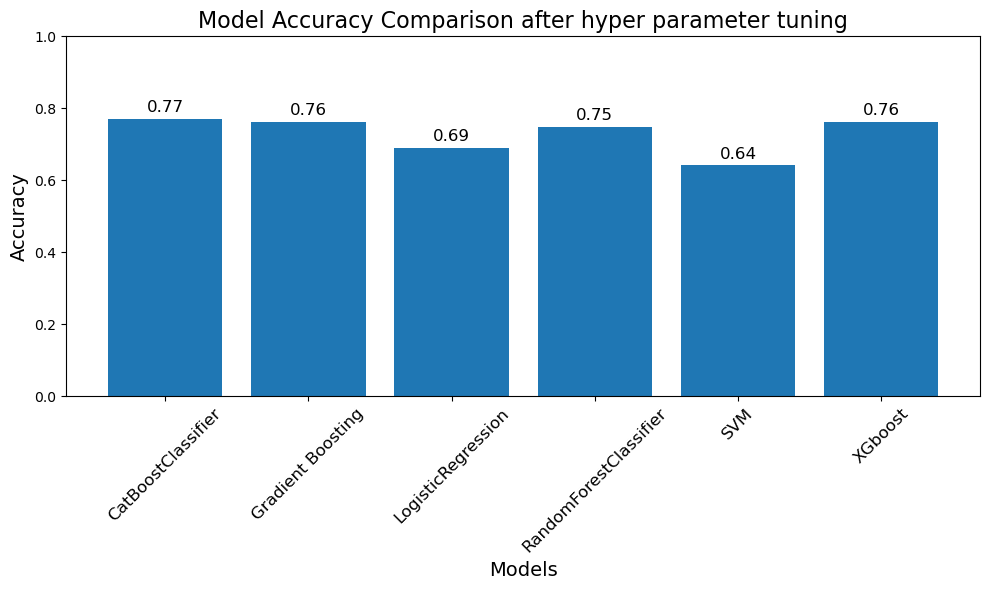

In [ ]:
model_names = ['CatBoostClassifier','Gradient Boosting','LogisticRegression','RandomForestClassifier','SVM','XGboost']
accuracies = [0.771,0.762,0.69,0.749,0.642,0.762]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
for i, score in enumerate(accuracies):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title('Model Accuracy Comparison after hyper parameter tuning', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1)
plt.xticks(rotation=45, fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()

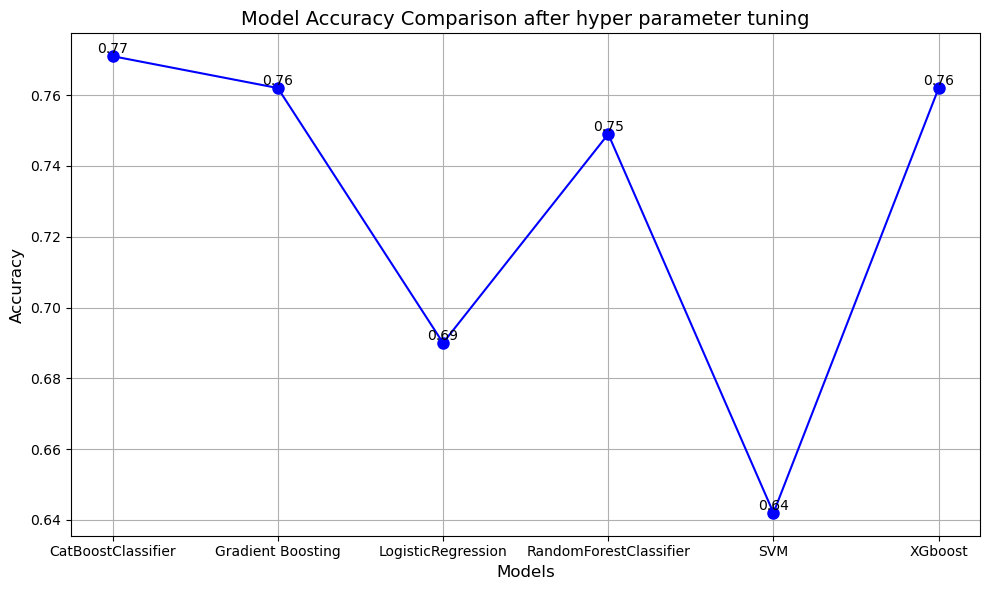

In [ ]:
#Model Accuracy Comparison after hyper parameter tuning
model_names = ['CatBoostClassifier','Gradient Boosting','LogisticRegression','RandomForestClassifier','SVM','XGboost']
accuracies = [0.771,0.762,0.69,0.749,0.642,0.762]

# Create a bar chart to visualize model accuracies
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b', markersize=8)

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison after hyper parameter tuning', fontsize=14)

# Add accuracy values next to the lines
for i in range(len(model_names)):
    plt.text(model_names[i], accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()

After applying hyperparameter tuning,test accuracy increased to 77% .Hence for our final model we will go with catboost algorithm as it gives best accuracy,F1 score and AUC as compared to other algorithms.

In [ ]:
final_model = CatBoostClassifier(iterations=600, depth=4, learning_rate=0.13, loss_function='Logloss', random_seed=42)

# Train the model on the training data
final_model.fit(X_train, Y_train)
print(final_model.score(X_train, Y_train))

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
classification_report_str = classification_report(Y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)


0:	learn: 0.6747351	total: 6.94ms	remaining: 4.16s
1:	learn: 0.6618672	total: 12.7ms	remaining: 3.79s
2:	learn: 0.6496398	total: 19ms	remaining: 3.78s
3:	learn: 0.6406086	total: 24.4ms	remaining: 3.64s
4:	learn: 0.6336264	total: 30.4ms	remaining: 3.62s
5:	learn: 0.6283932	total: 36.4ms	remaining: 3.6s
6:	learn: 0.6241048	total: 41.2ms	remaining: 3.49s
7:	learn: 0.6210483	total: 46.7ms	remaining: 3.45s
8:	learn: 0.6189974	total: 52.8ms	remaining: 3.47s
9:	learn: 0.6154066	total: 58.5ms	remaining: 3.45s
10:	learn: 0.6130128	total: 64.4ms	remaining: 3.45s
11:	learn: 0.6104018	total: 69.5ms	remaining: 3.41s
12:	learn: 0.6087795	total: 75.1ms	remaining: 3.39s
13:	learn: 0.6069908	total: 80.8ms	remaining: 3.38s
14:	learn: 0.6054070	total: 86.3ms	remaining: 3.36s
15:	learn: 0.6043270	total: 92.1ms	remaining: 3.36s
16:	learn: 0.6030437	total: 97.5ms	remaining: 3.34s
17:	learn: 0.6017816	total: 103ms	remaining: 3.34s
18:	learn: 0.5983422	total: 108ms	remaining: 3.31s
19:	learn: 0.5967810	total:

177:	learn: 0.4988248	total: 1.03s	remaining: 2.45s
178:	learn: 0.4983482	total: 1.04s	remaining: 2.44s
179:	learn: 0.4980845	total: 1.05s	remaining: 2.44s
180:	learn: 0.4977732	total: 1.05s	remaining: 2.44s
181:	learn: 0.4972179	total: 1.06s	remaining: 2.43s
182:	learn: 0.4968485	total: 1.06s	remaining: 2.42s
183:	learn: 0.4964819	total: 1.07s	remaining: 2.41s
184:	learn: 0.4962719	total: 1.07s	remaining: 2.41s
185:	learn: 0.4960309	total: 1.08s	remaining: 2.4s
186:	learn: 0.4956363	total: 1.08s	remaining: 2.4s
187:	learn: 0.4953579	total: 1.09s	remaining: 2.39s
188:	learn: 0.4950364	total: 1.1s	remaining: 2.38s
189:	learn: 0.4947001	total: 1.1s	remaining: 2.38s
190:	learn: 0.4942981	total: 1.11s	remaining: 2.37s
191:	learn: 0.4939685	total: 1.11s	remaining: 2.37s
192:	learn: 0.4935049	total: 1.12s	remaining: 2.36s
193:	learn: 0.4932313	total: 1.13s	remaining: 2.35s
194:	learn: 0.4930066	total: 1.13s	remaining: 2.35s
195:	learn: 0.4925044	total: 1.14s	remaining: 2.34s
196:	learn: 0.49

344:	learn: 0.4488664	total: 2.06s	remaining: 1.52s
345:	learn: 0.4485371	total: 2.06s	remaining: 1.52s
346:	learn: 0.4482894	total: 2.07s	remaining: 1.51s
347:	learn: 0.4479603	total: 2.08s	remaining: 1.5s
348:	learn: 0.4477633	total: 2.08s	remaining: 1.5s
349:	learn: 0.4475863	total: 2.09s	remaining: 1.49s
350:	learn: 0.4473163	total: 2.09s	remaining: 1.48s
351:	learn: 0.4471557	total: 2.1s	remaining: 1.48s
352:	learn: 0.4470400	total: 2.1s	remaining: 1.47s
353:	learn: 0.4468842	total: 2.11s	remaining: 1.46s
354:	learn: 0.4466458	total: 2.11s	remaining: 1.46s
355:	learn: 0.4464218	total: 2.12s	remaining: 1.45s
356:	learn: 0.4462382	total: 2.12s	remaining: 1.45s
357:	learn: 0.4460331	total: 2.13s	remaining: 1.44s
358:	learn: 0.4458843	total: 2.14s	remaining: 1.43s
359:	learn: 0.4456484	total: 2.14s	remaining: 1.43s
360:	learn: 0.4453769	total: 2.15s	remaining: 1.42s
361:	learn: 0.4451748	total: 2.15s	remaining: 1.42s
362:	learn: 0.4449118	total: 2.16s	remaining: 1.41s
363:	learn: 0.44

514:	learn: 0.4150569	total: 3.06s	remaining: 505ms
515:	learn: 0.4148773	total: 3.07s	remaining: 500ms
516:	learn: 0.4147409	total: 3.07s	remaining: 494ms
517:	learn: 0.4146237	total: 3.08s	remaining: 488ms
518:	learn: 0.4143936	total: 3.08s	remaining: 482ms
519:	learn: 0.4142472	total: 3.09s	remaining: 476ms
520:	learn: 0.4140145	total: 3.1s	remaining: 470ms
521:	learn: 0.4137336	total: 3.1s	remaining: 464ms
522:	learn: 0.4135011	total: 3.11s	remaining: 458ms
523:	learn: 0.4134173	total: 3.11s	remaining: 452ms
524:	learn: 0.4132332	total: 3.12s	remaining: 446ms
525:	learn: 0.4130241	total: 3.13s	remaining: 440ms
526:	learn: 0.4126567	total: 3.13s	remaining: 434ms
527:	learn: 0.4125647	total: 3.14s	remaining: 428ms
528:	learn: 0.4124674	total: 3.14s	remaining: 422ms
529:	learn: 0.4123102	total: 3.15s	remaining: 416ms
530:	learn: 0.4121803	total: 3.16s	remaining: 411ms
531:	learn: 0.4120041	total: 3.17s	remaining: 405ms
532:	learn: 0.4118666	total: 3.17s	remaining: 399ms
533:	learn: 0.

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 720  328]
 [ 228 1153]]


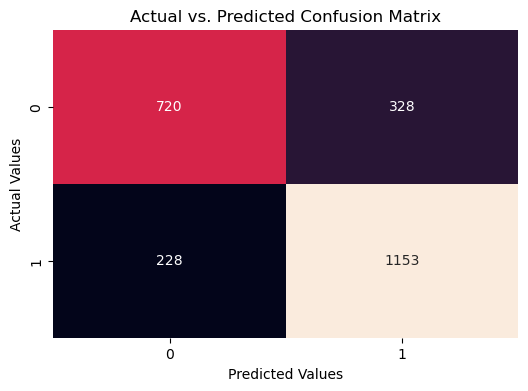

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## FEATURE IMPORTANCE

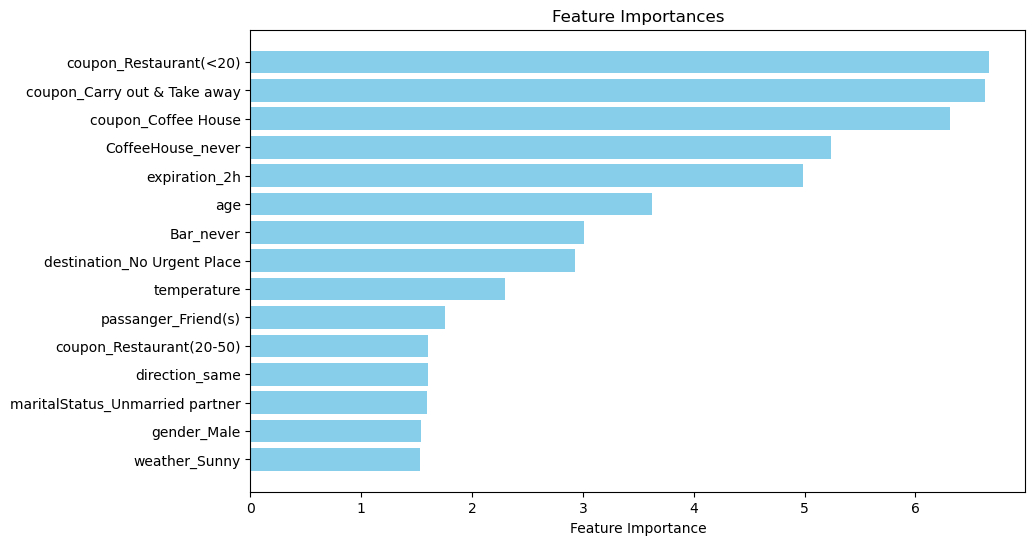

                            Feature  Importance
16           coupon_Restaurant(<20)    6.659812
13     coupon_Carry out & Take away    6.628136
14              coupon_Coffee House    6.313448
67                CoffeeHouse_never    5.236276
17                    expiration_2h    4.984985
1                               age    3.621767
63                        Bar_never    3.010299
6       destination_No Urgent Place    2.926284
0                       temperature    2.295493
8               passanger_Friend(s)    1.753390
15         coupon_Restaurant(20-50)    1.605576
5                    direction_same    1.603886
21  maritalStatus_Unmarried partner    1.592368
18                      gender_Male    1.540640
12                    weather_Sunny    1.527209


In [ ]:
from catboost import CatBoostClassifier
feature_importances = final_model.get_feature_importance(type='FeatureImportance')

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df=importance_df.head(15)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

# Display the importance DataFrame
print(importance_df)


Based on the summary plot, it shows that coupon_Restaurant(<20) ,coupon_Carry out & Take away and coupon_Coffee House give the most impact on the model decision.

## ERROR RATE

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Here we calculate the test error rate!
test_error_rate = 1 - accuracy
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate))

The test error rate for our model is:
  0.2289


## Area Under Curve (AUC)

In [ ]:
predictions_prob = model6.predict_proba(X_test)[:, 1]

fpr2, tpr2,_ = roc_curve(Y_test,
                          predictions_prob,
                          pos_label = 1)
auc=auc(fpr2,tpr2)
auc

0.8339753387024559

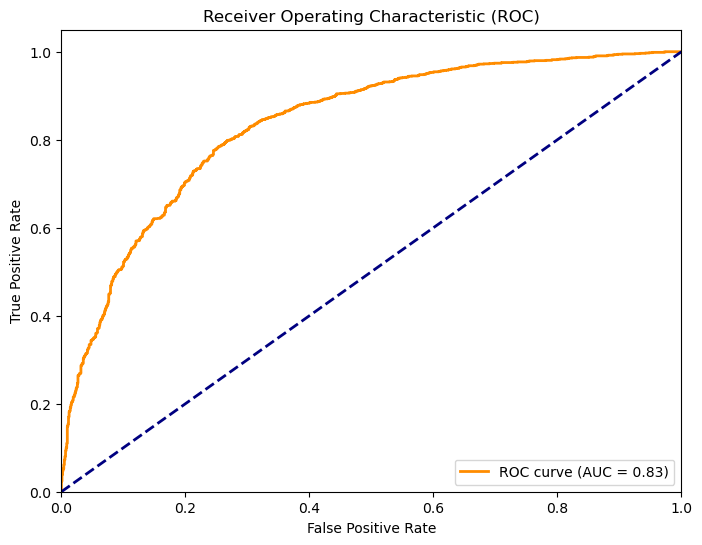

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The Receiver Operating Characteristic (ROC) curve illustrates the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity) across different thresholds. With an Area Under the Curve (AUC) of 0.83, our model demonstrates reasonably good discriminative power.